### Importación de datos



In [10]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [17]:
# En este primer análisis, debes calcular el ingreso total de cada tienda.
# Sumando los valores de la columna Precio de cada conjunto de datos de la 
# tienda para estimar los ingresos.

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

NOMBRE_TIENDA = []
INGRESO_TOTAL = []

for nombre, datos in tiendas.items():
    ingreso = datos["Precio"].sum()
    NOMBRE_TIENDA.append(nombre)
    INGRESO_TOTAL.append(ingreso)
    print(f"{nombre}: ${ingreso:.0f}") 

Tienda 1: $1150880400
Tienda 2: $1116343500
Tienda 3: $1098019600
Tienda 4: $1038375700


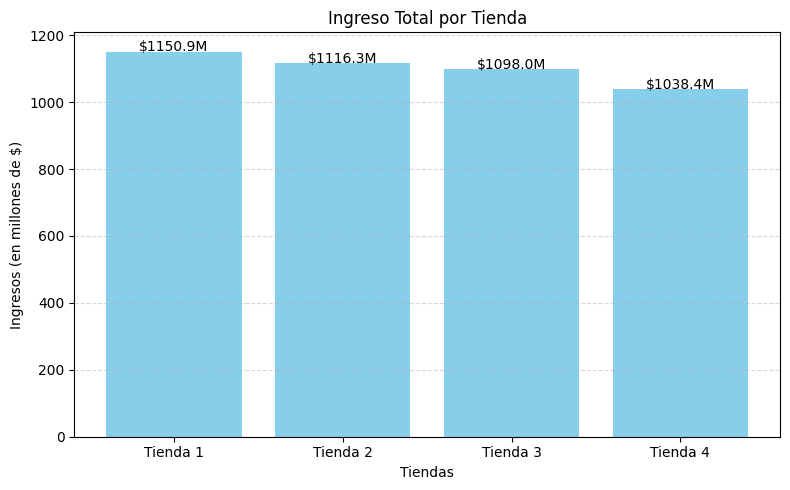

In [19]:
# Convertir ingresos a millones para mostrar en eje y
ingresos_millones = [i / 1_000_000 for i in INGRESO_TOTAL]

plt.figure(figsize=(8, 5))
barras = plt.bar(NOMBRE_TIENDA, ingresos_millones, color='skyblue')
plt.title('Ingreso Total por Tienda')
plt.ylabel('Ingresos (en millones de $)')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar etiquetas arriba de cada barra
for i, valor in enumerate(ingresos_millones):
    plt.text(i, valor + 0.5, f"${valor:.1f}M", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [21]:
# En este debes calcular la cantidad de productos vendidos por categoría en cada 
# tienda. La idea es agrupar los datos por categoría y contar el número de
# ventas de cada tipo, mostrando las categorías más populares de cada tienda.

ENUM_PROD = []

for nombre, datos in tiendas.items():
    ENU_PRO = datos["Categoría del Producto"].value_counts().reset_index(name="cantidad")
    NOMBRE_TIENDA.append(nombre)
    ENUM_PROD.append(ENU_PRO)
    print(f"\n{nombre}:_________________\n{ENU_PRO}")


Tienda 1:_________________
    Categoría del Producto  cantidad
0                  Muebles       465
1             Electrónicos       448
2                 Juguetes       324
3        Electrodomésticos       312
4     Deportes y diversión       284
5   Instrumentos musicales       182
6                   Libros       173
7  Artículos para el hogar       171

Tienda 2:_________________
    Categoría del Producto  cantidad
0                  Muebles       442
1             Electrónicos       422
2                 Juguetes       313
3        Electrodomésticos       305
4     Deportes y diversión       275
5   Instrumentos musicales       224
6                   Libros       197
7  Artículos para el hogar       181

Tienda 3:_________________
    Categoría del Producto  cantidad
0                  Muebles       499
1             Electrónicos       451
2                 Juguetes       315
3        Electrodomésticos       278
4     Deportes y diversión       277
5                   Libros  

# 3. Calificación promedio de la tienda


In [5]:
# En este paso, debes calcular las calificaciones promedio de los clientes 
# para cada tienda. El objetivo es conocer la satisfacción del cliente con 
# los productos vendidos.

CAL_PROMEDIO_T1 = sum(tienda["Calificación"]) / len(tienda["Calificación"])
CAL_PROMEDIO_T2 = sum(tienda2["Calificación"]) / len(tienda2["Calificación"])
CAL_PROMEDIO_T3 = sum(tienda3["Calificación"]) / len(tienda3["Calificación"])
CAL_PROMEDIO_T4 = sum(tienda4["Calificación"]) / len(tienda4["Calificación"])

print(f"""CALIFICACIONES:
TIENDA 1: {"{0:.3f}".format(CAL_PROMEDIO_T1)}/5.0 
TIENDA 2: {"{0:.3f}".format(CAL_PROMEDIO_T2)}/5.0 
TIENDA 3: {"{0:.3f}".format(CAL_PROMEDIO_T3)}/5.0
TIENDA 4: {"{0:.3f}".format(CAL_PROMEDIO_T4)}/5.0""" )

CALIFICACIONES:
TIENDA 1: 3.977/5.0 
TIENDA 2: 4.037/5.0 
TIENDA 3: 4.048/5.0
TIENDA 4: 3.996/5.0


# 4. Productos más y menos vendidos

In [ ]:
# En este paso, debes identificar qué productos fueron los más vendidos y 
# los menos vendidos en cada tienda. Visualiza los resultados para que quede 
# claro qué productos destacaron en ventas en cada tienda.

for nombre, datos in tiendas.items():
    conteo = datos["Producto"].value_counts()
    
    mas_vendido = conteo.index[0]
    cantidad_mas = conteo.iloc[0]
    
    menos_vendido = conteo.index[-1]
    cantidad_menos = conteo.iloc[-1]
    
    print(f"""{nombre}:
Más vendido: {mas_vendido} ({cantidad_mas} ventas)
Menos vendido: {menos_vendido} ({cantidad_menos} ventas)
""")

In [7]:
# para comprobar
PRUEBA_T1 = tienda["Producto"].value_counts().reset_index(name="cantidad")
print(PRUEBA_T1)

                       Producto  cantidad
0                 TV LED UHD 4K        60
1                       Armario        60
2                    Microondas        60
3              Secadora de ropa        58
4       Bloques de construcción        56
5                 Mesa de noche        56
6           Balón de baloncesto        55
7                  Vaso térmico        54
8                     Impresora        54
9                     Bicicleta        54
10                 Refrigerador        54
11                      Batería        53
12                   Cubertería        52
13    Carrito de control remoto        52
14          Modelado predictivo        51
15                  Auriculares        50
16                    Iphone 15        49
17            Ajedrez de madera        49
18                 Lavavajillas        48
19             Lavadora de ropa        47
20           Guitarra eléctrica        47
21            Guitarra acústica        46
22              Sofá reclinable   

# 5. Envío promedio por tienda

In [ ]:
# En este paso, debes calcular el costo de envío promedio para cada tienda.
# El objetivo es comprender cuánto se gasta, en promedio, en el envío de 
# cada tienda.

for nombre, datos in tiendas.items():
    costo_envio_promedio = datos["Costo de envío"].mean()
    print(f"{nombre}: ${costo_envio_promedio:.2f}")